In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import get_data_loaders, train, test
from PIL import Image
import pandas as pd

In [2]:
root = './distilled_dataset'

### CIFAR100 Distilled

In [3]:
class CIFAR100_Distilled(Dataset):
    def __init__(self, idx_df, transform):
        self.idx_df = idx_df
        self.transform = transform
    
    def __len__(self):
        return len(self.idx_df)

    def __getitem__(self, index):
        entry = self.idx_df.iloc[index]
        image = self.transform(Image.open(entry.image_path))
        label = entry.label
        return image, torch.tensor(label)

In [4]:
index_file = pd.read_csv('./CIFAR100_DM_index_files/ipc100_idx.csv')
index_file

,image_path,label
0,./CIFAR100_DM/ipc100/class0/00169883-da36-44ac...,0
1,./CIFAR100_DM/ipc100/class0/03979495-b927-4b32...,0
2,./CIFAR100_DM/ipc100/class0/06bbf568-f1cf-4b0e...,0
3,./CIFAR100_DM/ipc100/class0/09183e31-0bf4-4106...,0
4,./CIFAR100_DM/ipc100/class0/0a1dddd0-2ee6-4023...,0
...,...,...
9995,./CIFAR100_DM/ipc100/class99/f9820d24-1cb4-486...,99
9996,./CIFAR100_DM/ipc100/class99/fbf46794-ec4a-413...,99
9997,./CIFAR100_DM/ipc100/class99/fd2ebea7-390b-448...,99
9998,./CIFAR100_DM/ipc100/class99/fd655351-a9e2-45c...,99


In [5]:
image_normalize= transforms.Lambda(lambda img: 2 * img / 255. - 1) # normalize to [-1, 1]
# https://github.com/Lornatang/pytorch-alexnet-cifar100/blob/master/utils/datasets.py
transform = transforms.Compose([
                                transforms.Resize(128),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                # image_normalize,
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                              ])
cifar100_distilled_train = CIFAR100_Distilled(index_file, transform)

cifar100_root = '../cifar100'
cifar100_test = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                transforms.Resize(128),
                                                transforms.ToTensor(),
                                                # image_normalize,
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                                # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                              ]))

In [6]:
batch_size = 64 
train_data_loader, test_data_loader = get_data_loaders(cifar100_distilled_train, cifar100_test, batch_size=batch_size)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [8]:
import os 
model_name = 'alexnet'
dataset = 'cifar100_distilled'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
model = torchvision.models.alexnet(num_classes=100).to(device)

In [9]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100, optimizer='sgd', lr=1e-2)

Epoch 1: 100%|██████████| 157/157 [00:19<00:00,  8.06it/s, loss=4.3] 


epoch: 1 done, loss: 0.07186215370893478
Acc: 0.0081
[0.01]


Epoch 2: 100%|██████████| 157/157 [00:19<00:00,  7.86it/s, loss=4.1] 


epoch: 2 done, loss: 0.067378930747509
Acc: 0.0301
[0.01]


Epoch 3: 100%|██████████| 157/157 [00:20<00:00,  7.72it/s, loss=3.13]


epoch: 3 done, loss: 0.05633016675710678
Acc: 0.0674
[0.01]


Epoch 4: 100%|██████████| 157/157 [00:19<00:00,  8.05it/s, loss=2.04]


epoch: 4 done, loss: 0.043556686490774155
Acc: 0.0903
[0.01]


Epoch 5: 100%|██████████| 157/157 [00:18<00:00,  8.31it/s, loss=2.07]


epoch: 5 done, loss: 0.036364320665597916
Acc: 0.1168
[0.01]


Epoch 6: 100%|██████████| 157/157 [00:18<00:00,  8.27it/s, loss=1.89]


epoch: 6 done, loss: 0.03189222142100334
Acc: 0.1222
[0.01]


Epoch 7: 100%|██████████| 157/157 [00:18<00:00,  8.47it/s, loss=1.64]


epoch: 7 done, loss: 0.028195517137646675
Acc: 0.1374
[0.01]


Epoch 8: 100%|██████████| 157/157 [00:18<00:00,  8.33it/s, loss=1.6] 


epoch: 8 done, loss: 0.025385890156030655
Acc: 0.1444
[0.01]


Epoch 9: 100%|██████████| 157/157 [00:18<00:00,  8.35it/s, loss=1.23]


epoch: 9 done, loss: 0.022971637547016144
Acc: 0.1683
[0.01]


Epoch 10: 100%|██████████| 157/157 [00:18<00:00,  8.49it/s, loss=0.949]


epoch: 10 done, loss: 0.021402228623628616
Acc: 0.1782
[0.01]


Epoch 11: 100%|██████████| 157/157 [00:18<00:00,  8.32it/s, loss=0.843]


epoch: 11 done, loss: 0.019079653546214104
Acc: 0.1793
[0.01]


Epoch 12: 100%|██████████| 157/157 [00:20<00:00,  7.81it/s, loss=0.704]


epoch: 12 done, loss: 0.017842158675193787
Acc: 0.1796
[0.01]


Epoch 13: 100%|██████████| 157/157 [00:20<00:00,  7.78it/s, loss=0.858]


epoch: 13 done, loss: 0.016682380810379982
Acc: 0.1643
[0.01]


Epoch 14: 100%|██████████| 157/157 [00:19<00:00,  7.93it/s, loss=1.27] 


epoch: 14 done, loss: 0.0156152518466115
Acc: 0.1866
[0.01]


Epoch 15: 100%|██████████| 157/157 [00:19<00:00,  7.86it/s, loss=1.48] 


epoch: 15 done, loss: 0.014222385361790657
Acc: 0.1881
[0.01]


Epoch 16: 100%|██████████| 157/157 [00:19<00:00,  7.93it/s, loss=0.856]


epoch: 16 done, loss: 0.013859698548913002
Acc: 0.2018
[0.01]


Epoch 17: 100%|██████████| 157/157 [00:19<00:00,  8.12it/s, loss=0.257]


epoch: 17 done, loss: 0.012251020409166813
Acc: 0.2063
[0.01]


Epoch 18: 100%|██████████| 157/157 [00:19<00:00,  8.23it/s, loss=0.479]


epoch: 18 done, loss: 0.011447438038885593
Acc: 0.2037
[0.01]


Epoch 19: 100%|██████████| 157/157 [00:18<00:00,  8.31it/s, loss=0.536]


epoch: 19 done, loss: 0.010632365942001343
Acc: 0.1928
[0.01]


Epoch 20: 100%|██████████| 157/157 [00:18<00:00,  8.31it/s, loss=0.871]


epoch: 20 done, loss: 0.010769524611532688
Acc: 0.209
[0.01]


Epoch 21: 100%|██████████| 157/157 [00:18<00:00,  8.39it/s, loss=0.883]


epoch: 21 done, loss: 0.009938569739460945
Acc: 0.2086
[0.01]


Epoch 22: 100%|██████████| 157/157 [00:18<00:00,  8.30it/s, loss=0.148]


epoch: 22 done, loss: 0.009853034280240536
Acc: 0.2162
[0.01]


Epoch 23: 100%|██████████| 157/157 [00:18<00:00,  8.67it/s, loss=0.193]


epoch: 23 done, loss: 0.008479395881295204
Acc: 0.2141
[0.01]


Epoch 24: 100%|██████████| 157/157 [00:18<00:00,  8.47it/s, loss=0.728]


epoch: 24 done, loss: 0.008389562368392944
Acc: 0.2063
[0.01]


Epoch 25: 100%|██████████| 157/157 [00:18<00:00,  8.34it/s, loss=0.731]


epoch: 25 done, loss: 0.008336380124092102
Acc: 0.2028
[0.01]


Epoch 26: 100%|██████████| 157/157 [00:19<00:00,  7.93it/s, loss=0.911]


epoch: 26 done, loss: 0.008248666301369667
Acc: 0.1976
[0.01]


Epoch 27: 100%|██████████| 157/157 [00:20<00:00,  7.78it/s, loss=0.53] 


epoch: 27 done, loss: 0.008156825788319111
Acc: 0.201
[0.01]


Epoch 28: 100%|██████████| 157/157 [00:20<00:00,  7.79it/s, loss=0.367]


epoch: 28 done, loss: 0.007281336933374405
Acc: 0.2027
[0.01]


Epoch 29: 100%|██████████| 157/157 [00:20<00:00,  7.76it/s, loss=0.243]


epoch: 29 done, loss: 0.0070892879739403725
Acc: 0.21
[0.01]


Epoch 30: 100%|██████████| 157/157 [00:20<00:00,  7.79it/s, loss=0.102]


epoch: 30 done, loss: 0.006869378499686718
Acc: 0.206
[0.01]


Epoch 31: 100%|██████████| 157/157 [00:19<00:00,  8.07it/s, loss=1.03] 


epoch: 31 done, loss: 0.0063720629550516605
Acc: 0.2006
[0.01]


Epoch 32: 100%|██████████| 157/157 [00:20<00:00,  7.60it/s, loss=0.555]


epoch: 32 done, loss: 0.007401636335998774
Acc: 0.2161
[0.01]


Epoch 33: 100%|██████████| 157/157 [00:19<00:00,  8.09it/s, loss=0.153]


epoch: 33 done, loss: 0.006655736360698938
Acc: 0.209
[0.01]


Epoch 34: 100%|██████████| 157/157 [00:19<00:00,  8.16it/s, loss=0.807]


epoch: 34 done, loss: 0.006009334232658148
Acc: 0.2169
[0.01]


Epoch 35: 100%|██████████| 157/157 [00:19<00:00,  8.24it/s, loss=0.263]


epoch: 35 done, loss: 0.006053320597857237
Acc: 0.2023
[0.01]


Epoch 36: 100%|██████████| 157/157 [00:19<00:00,  8.24it/s, loss=0.0769]


epoch: 36 done, loss: 0.006039510015398264
Acc: 0.1997
[0.01]


Epoch 37: 100%|██████████| 157/157 [00:19<00:00,  8.24it/s, loss=0.525]


epoch: 37 done, loss: 0.005586124956607819
Acc: 0.1934
[0.01]


Epoch 38: 100%|██████████| 157/157 [00:19<00:00,  8.02it/s, loss=0.216]


epoch: 38 done, loss: 0.005583825521171093
Acc: 0.2057
[0.01]


Epoch 39: 100%|██████████| 157/157 [00:19<00:00,  8.02it/s, loss=0.368]


epoch: 39 done, loss: 0.00563461659476161
Acc: 0.2058
[0.01]


Epoch 40: 100%|██████████| 157/157 [00:19<00:00,  8.23it/s, loss=0.297]


epoch: 40 done, loss: 0.005145445931702852
Acc: 0.205
[0.01]


Epoch 41: 100%|██████████| 157/157 [00:18<00:00,  8.39it/s, loss=0.533]


epoch: 41 done, loss: 0.0056763882748782635
Acc: 0.21
[0.01]


Epoch 42: 100%|██████████| 157/157 [00:18<00:00,  8.28it/s, loss=0.497]


epoch: 42 done, loss: 0.005381521303206682
Acc: 0.2057
[0.01]


Epoch 43: 100%|██████████| 157/157 [00:19<00:00,  8.17it/s, loss=0.326]


epoch: 43 done, loss: 0.005252111237496138
Acc: 0.1974
[0.01]


Epoch 44: 100%|██████████| 157/157 [00:19<00:00,  8.13it/s, loss=0.252]


epoch: 44 done, loss: 0.0053445748053491116
Acc: 0.1943
[0.001]


Epoch 45: 100%|██████████| 157/157 [00:19<00:00,  8.15it/s, loss=0.0292]


epoch: 45 done, loss: 0.0024144956842064857
Acc: 0.2147
[0.001]


Epoch 46: 100%|██████████| 157/157 [00:18<00:00,  8.34it/s, loss=0.224] 


epoch: 46 done, loss: 0.0015414283843711019
Acc: 0.2246
[0.001]


Epoch 47: 100%|██████████| 157/157 [00:19<00:00,  8.26it/s, loss=0.0772] 


epoch: 47 done, loss: 0.0011526074958965182
Acc: 0.2184
[0.001]


Epoch 48: 100%|██████████| 157/157 [00:18<00:00,  8.34it/s, loss=0.0118]


epoch: 48 done, loss: 0.0010564954718574882
Acc: 0.2235
[0.001]


Epoch 49: 100%|██████████| 157/157 [00:19<00:00,  8.23it/s, loss=0.00797]


epoch: 49 done, loss: 0.0009435284300707281
Acc: 0.2227
[0.001]


Epoch 50: 100%|██████████| 157/157 [00:18<00:00,  8.28it/s, loss=0.00465]


epoch: 50 done, loss: 0.0008155539399012923
Acc: 0.2249
[0.001]


Epoch 51: 100%|██████████| 157/157 [00:18<00:00,  8.30it/s, loss=0.145]  


epoch: 51 done, loss: 0.0007008211105130613
Acc: 0.2244
[0.001]


Epoch 52: 100%|██████████| 157/157 [00:19<00:00,  8.25it/s, loss=0.00484]


epoch: 52 done, loss: 0.0006690730224363506
Acc: 0.2246
[0.001]


Epoch 53: 100%|██████████| 157/157 [00:18<00:00,  8.42it/s, loss=0.0101] 


epoch: 53 done, loss: 0.0006029954529367387
Acc: 0.2257
[0.001]


Epoch 54: 100%|██████████| 157/157 [00:18<00:00,  8.31it/s, loss=0.0183] 


epoch: 54 done, loss: 0.0005976540851406753
Acc: 0.2247
[0.001]


Epoch 55: 100%|██████████| 157/157 [00:19<00:00,  8.20it/s, loss=0.0119] 


epoch: 55 done, loss: 0.0005455419886857271
Acc: 0.2259
[0.001]


Epoch 56: 100%|██████████| 157/157 [00:18<00:00,  8.30it/s, loss=0.0169] 


epoch: 56 done, loss: 0.0005129938363097608
Acc: 0.2268
[0.001]


Epoch 57: 100%|██████████| 157/157 [00:19<00:00,  8.21it/s, loss=0.0415] 


epoch: 57 done, loss: 0.00046612060396000743
Acc: 0.2269
[0.001]


Epoch 58: 100%|██████████| 157/157 [00:19<00:00,  8.23it/s, loss=0.222]  


epoch: 58 done, loss: 0.0004609441675711423
Acc: 0.2288
[0.001]


Epoch 59: 100%|██████████| 157/157 [00:19<00:00,  8.16it/s, loss=0.0428] 


epoch: 59 done, loss: 0.00040744399302639067
Acc: 0.2274
[0.001]


Epoch 60: 100%|██████████| 157/157 [00:18<00:00,  8.32it/s, loss=0.00774]


epoch: 60 done, loss: 0.0004190047038719058
Acc: 0.2309
[0.001]


Epoch 61: 100%|██████████| 157/157 [00:18<00:00,  8.36it/s, loss=0.000636]


epoch: 61 done, loss: 0.00042178735020570457
Acc: 0.2254
[0.001]


Epoch 62: 100%|██████████| 157/157 [00:18<00:00,  8.27it/s, loss=0.00345]


epoch: 62 done, loss: 0.00040103253559209406
Acc: 0.2241
[0.001]


Epoch 63: 100%|██████████| 157/157 [00:18<00:00,  8.34it/s, loss=0.0223]  


epoch: 63 done, loss: 0.0003583626530598849
Acc: 0.2258
[0.001]


Epoch 64: 100%|██████████| 157/157 [00:18<00:00,  8.31it/s, loss=0.00499] 


epoch: 64 done, loss: 0.0003314814530313015
Acc: 0.2267
[0.001]


Epoch 65: 100%|██████████| 157/157 [00:18<00:00,  8.38it/s, loss=0.00172] 


epoch: 65 done, loss: 0.0003501174505800009
Acc: 0.2261
[0.001]


Epoch 66: 100%|██████████| 157/157 [00:19<00:00,  8.21it/s, loss=0.163]  


epoch: 66 done, loss: 0.00039998727152124047
Acc: 0.2263
[0.001]


Epoch 67: 100%|██████████| 157/157 [00:18<00:00,  8.33it/s, loss=6.12e-5] 


epoch: 67 done, loss: 0.00036447212914936244
Acc: 0.225
[0.001]


Epoch 68: 100%|██████████| 157/157 [00:18<00:00,  8.46it/s, loss=2.97e-5] 


epoch: 68 done, loss: 0.000347919441992417
Acc: 0.2268
[0.0001]


Epoch 69: 100%|██████████| 157/157 [00:18<00:00,  8.59it/s, loss=0.000958]


epoch: 69 done, loss: 0.00028174184262752533
Acc: 0.2263
[0.0001]


Epoch 70: 100%|██████████| 157/157 [00:18<00:00,  8.34it/s, loss=0.00252] 


epoch: 70 done, loss: 0.000339776772307232
Acc: 0.2261
[0.0001]


Epoch 71: 100%|██████████| 157/157 [00:19<00:00,  8.23it/s, loss=0.00211] 


epoch: 71 done, loss: 0.00029618540429510176
Acc: 0.2255
[0.0001]


Epoch 72: 100%|██████████| 157/157 [00:18<00:00,  8.30it/s, loss=0.00605]


epoch: 72 done, loss: 0.00031877210130915046
Acc: 0.2261
[0.0001]


Epoch 73: 100%|██████████| 157/157 [00:19<00:00,  8.25it/s, loss=0.000122]


epoch: 73 done, loss: 0.0003213777672499418
Acc: 0.2259
[1e-05]


Epoch 74: 100%|██████████| 157/157 [00:18<00:00,  8.32it/s, loss=0.119]   


epoch: 74 done, loss: 0.00033268058905377984
Acc: 0.2259
[1e-05]


Epoch 75: 100%|██████████| 157/157 [00:19<00:00,  8.23it/s, loss=0.0453]  


epoch: 75 done, loss: 0.0003077448927797377
Acc: 0.2258
[1e-05]


Epoch 76: 100%|██████████| 157/157 [00:18<00:00,  8.27it/s, loss=1.16e-5] 


epoch: 76 done, loss: 0.00033246888779103756
Acc: 0.2258
[1e-05]


Epoch 77: 100%|██████████| 157/157 [00:18<00:00,  8.37it/s, loss=0.0207]  


epoch: 77 done, loss: 0.00029937803628854454
Acc: 0.2254
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 157/157 [00:18<00:00,  8.32it/s, loss=0.00136] 


epoch: 78 done, loss: 0.000290413066977635
Acc: 0.2254
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 157/157 [00:19<00:00,  8.19it/s, loss=0.00025] 


epoch: 79 done, loss: 0.000287797738565132
Acc: 0.2255
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 157/157 [00:18<00:00,  8.34it/s, loss=0.00861] 


epoch: 80 done, loss: 0.0002768237318377942
Acc: 0.2254
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 157/157 [00:18<00:00,  8.47it/s, loss=0.00642] 


epoch: 81 done, loss: 0.0002942312858067453
Acc: 0.2254
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 157/157 [00:18<00:00,  8.54it/s, loss=0.000716]


epoch: 82 done, loss: 0.0003315530775580555
Acc: 0.2254
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 157/157 [00:18<00:00,  8.36it/s, loss=0.208]   


epoch: 83 done, loss: 0.0002937902172561735
Acc: 0.2254
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 157/157 [00:18<00:00,  8.39it/s, loss=0.015]   


epoch: 84 done, loss: 0.00030614392017014325
Acc: 0.2254
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 157/157 [00:18<00:00,  8.56it/s, loss=0.000809]


epoch: 85 done, loss: 0.00029538432136178017
Acc: 0.2255
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 157/157 [00:18<00:00,  8.46it/s, loss=0.0401]  


epoch: 86 done, loss: 0.000320509891025722
Acc: 0.2254
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 157/157 [00:18<00:00,  8.54it/s, loss=0.0146]  


epoch: 87 done, loss: 0.0002842073154170066
Acc: 0.2254
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 157/157 [00:18<00:00,  8.47it/s, loss=0.000386]


epoch: 88 done, loss: 0.00032037062919698656
Acc: 0.2254
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 157/157 [00:18<00:00,  8.34it/s, loss=0.000106]


epoch: 89 done, loss: 0.0003080066235270351
Acc: 0.2256
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 157/157 [00:18<00:00,  8.58it/s, loss=0.148]   


epoch: 90 done, loss: 0.0002985425526276231
Acc: 0.2255
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 157/157 [00:18<00:00,  8.60it/s, loss=0.0156]  


epoch: 91 done, loss: 0.0002895365469157696
Acc: 0.2255
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 157/157 [00:17<00:00,  8.82it/s, loss=1.41e-5]


epoch: 92 done, loss: 0.0003145606315229088
Acc: 0.2255
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 157/157 [00:17<00:00,  9.10it/s, loss=0.000424]


epoch: 93 done, loss: 0.0002825988340191543
Acc: 0.2254
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 157/157 [00:17<00:00,  9.14it/s, loss=0.018]   


epoch: 94 done, loss: 0.00030509071075357497
Acc: 0.2255
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 157/157 [00:17<00:00,  9.23it/s, loss=0.000599]


epoch: 95 done, loss: 0.0002793791936710477
Acc: 0.2256
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 157/157 [00:17<00:00,  9.10it/s, loss=0.00169] 


epoch: 96 done, loss: 0.00030053770751692355
Acc: 0.2255
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 157/157 [00:16<00:00,  9.26it/s, loss=0.00277] 


epoch: 97 done, loss: 0.0002755297173280269
Acc: 0.2256
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 157/157 [00:18<00:00,  8.60it/s, loss=3.99e-5] 


epoch: 98 done, loss: 0.00028791980003006756
Acc: 0.2255
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 157/157 [00:18<00:00,  8.70it/s, loss=1.53e-6] 


epoch: 99 done, loss: 0.00027827254962176085
Acc: 0.2255
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 157/157 [00:17<00:00,  8.90it/s, loss=0.000143]


epoch: 100 done, loss: 0.0002755410096142441
Acc: 0.2256
[1.0000000000000002e-06]
Time taken: 3061.073366 seconds


In [10]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.2309, tensor(0.0832, device='cuda:0'))

<AxesSubplot: >

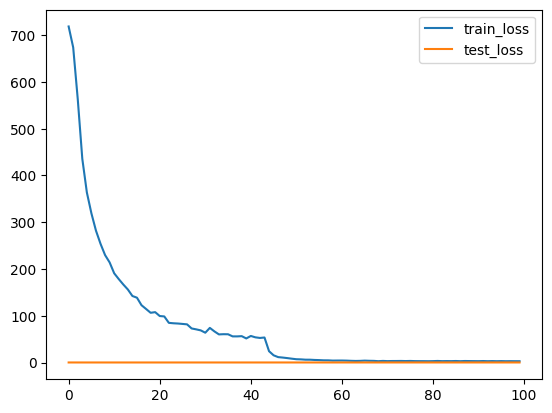

In [11]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])